<h1 style="text-align:center">NYC Open Data Week at TIQC</h1>
<h2 style="text-align:center">Introduction to Machine Learning</h2>

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="200px" height="200px" align="center" >

<img src="https://opendata.cityofnewyork.us/wp-content/themes/opendata-wp/assets/img/nyc-open-data-logo.svg" width="200px" height="200px" align="left" >

<img src="https://techincubatorqc.com/wp-content/uploads/2020/02/cropped-TechIncubator_web_black_red_logo-1.png" width="200px" height="200px" align="right" padding="top" >



Machine learning involves building mathematical models to help
understand data. “Learning” enters the fray when we give these models tunable
parameters that can be adapted to observed data; in this way the program can be considered
to be “learning” from the data. Once these models have been fit to previously
seen data, they can be used to predict and understand aspects of newly observed data.

## Categories of Machine Learning

**Supervised learning** involves somehow modeling the relationship between measured
features of data and some label associated with the data; once this model is determined,
it can be used to apply labels to new, unknown data. This is further subdivided
into classification tasks and regression tasks: in classification, the labels are
discrete categories, while in regression, the labels are continuous quantities. We will
see examples of both types of supervised learning in the following section.<br>

**Unsupervised learning** involves modeling the features of a dataset without reference to
any label, and is often described as “letting the dataset speak for itself.” These models
include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for
more succinct representations of the data. We will see examples of both types of
unsupervised learning in the following section.

**Semi-supervised learning methods**, which fall somewhere
between supervised learning and unsupervised learning. Semi-supervised
learning methods are often useful when only incomplete labels are available.

Terminology to discuss: overfitting and complexity, inference vs prediction

Source: [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126)

# Table of Contents

<div class = "alert alert-info">

1. [Loading the data](#1)<br>
    
2. [Supervised Machine Learning](#2)<br>
    
3. [Unsupervised Machine Learning](#3) <br>
  
  

</div>
<hr>

## The Greener, Greater Buildings historical data set

New York's [Greener, Greater Buildings](https://www.nyc.gov/html/gbee/downloads/pdf/greener_greater_buildings_plan.pdf) program is a sustainable growth iniative that aims to reduce greenhouse gas emissions by 30%. The program focusses on large buildings which consume the most resources. The stewards of these buildings must annually release public benchmarks of water and energy use. The buildings will also go through retro commissioning and audits every decade to help reduce resource use. Finally, non-commercial residential buildings must meet improved lighting codes.

The [clean heat](https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3) sample contains 4789 observations of the energy use for heating of buildings across New York City. The data contain information on the building's borough, Neighborhood Tabulation Area (NTA), owner, address, boiler type, fuel used, square footage, energy use, as well as if the building is part of the initative. Some of the features are a bit messy with miscoded values or types that are parsed incorrectly as Strings rather than numbers. 

**Data Provided by the Mayor's Office of Sustainability (MOS)**

Source: https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3

# Importing the clean heat data set <a id=1></a>

Python is a minimalist, almost Spartan programming language that is designed around easy of use. Scientists have steadily adopted the language which has lead to explosive growth in recent years. As a general purpose programming language, Python is vastly more powerful than other domain specific languages such as R or SAS.

Our workshop focusses on machine learning, but we'll be using several common, open source scientific Python libraries including:

* [NumPy](https://numpy.org/) - n dimensional arrays and linear algebra.
* [pandas](https://pandas.pydata.org/) - Columnar data frames.
* [Matplotlib](https://matplotlib.org/stable/index.html) - Lower level plotting and drawing interface.
* [Seaborn](https://seaborn.pydata.org/) - Higher level plotting interface with good defaults
* [scikit-learn](https://scikit-learn.org/stable/) - Machine learning algorithms with a consistent interface.

This workshop assumes that you **have a working Python 3 installation with the above libraries installed.** An easy way to get everything set up is to install [Anaconda](https://anaconda.org/) which is a free and open source package manager for scientific Python as well as R. Anaconda is available for Linux, Windows, and macOS. Anaconda is preferable to managing your own environment or using your system installation of Python (unless you're absolutely sure you know what you're doing).

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_heat = pd.read_csv("NYC_Clean_Heat_Dataset__Historical_.csv")

The code above simply loads several of the libraries we'll be using under the common aliases as well as loads the data set into a variable called _clean_heat_.

The libraries above, including scikit-learn, don't require your data to be stored as a pandas DataFrame. However, using DataFrames greatly simplifies a lot of the prerequisite work.

# Data cleaning (placeholder)

To do:

Fix Borough.
Fix sqft.

Preprocessing notes: 
Average of low/high for feature engineering
Clean up building_type by collapsing categories

Plots for EDA (don't run yet):
fig_sqftgal, ax_sqftgal = plt.subplots(figsize=(12, 10))
sns.scatterplot(x="bldg_sqft", y="total_gallons_high", hue="greener_greater_buildings",
data=clean_heat, ax=ax_sqftgal)

**explain code in separate chunks**
**add domain knowledge thingy**

In [79]:
clean_heat.columns = clean_heat.columns.str.lower().str.replace(' ', '_')

clean_heat.rename(columns={"total_gallons_(high)": "total_gallons_high",
                           "total_gallons_(low)": "total_gallons_low",
                           "total_mmbtu_(high)": "total_mmbtu_high",
                           "total_mmbtu_(low)": "total_mmbtu_low",
                           "boiler_capacity_(gross__btu)": "boiler_cap_btu",
                           "condo?": "condo",
                           "coop?": "coop",
                           "#_of_identical_boilers": "num_ident_boilers",
                           "#_of_bldgs": "num_bldgs",
                           "#_of_floors": "num_floors",
                           "#_of_res._units": "num_res_units",
                           "est._retirement_year": "est_retire_yr"},
                  errors="raise",
                  inplace=True)

# Descriptive categories
clean_heat.primary_fuel.replace({"#6": "Residual fuel",
                                 "#4": "Distillate fuel (#4)"},
                                inplace=True)

# The square feet variable is a String rather than an int
clean_heat.bldg_sqft = pd.to_numeric(clean_heat.bldg_sqft.str.replace("[\*|,]", "",
                                                                      regex=True))

# Miscoded points
# The data contain a handful of very strange observations!
# At least three points pointed to City Hall with sixty times the gallons
# used of the next maximum observation. I attempted to research the odd points
# but found nothing; filtering them out is probably the safest bet.
# Ultimately, we're filtering everything above 400K because the amount of observations
# is very small and we lack the domain knowledge to really know if they're "right".
clean_heat.loc[(clean_heat.total_gallons_high > 400000) |
               (clean_heat.total_gallons_low > 400000) |
               (clean_heat.total_gallons_high < 10) |
               (clean_heat.total_gallons_low < 10),
               ["total_gallons_high", "total_gallons_low"]] = np.nan

# The MMBTU features had similar weirdness. For example, there are at least
# six samples with low > high while also having strange numbers that are much
# higher than the rest of the data.
clean_heat.loc[(clean_heat.total_mmbtu_high > 50000) |
               (clean_heat.total_mmbtu_low > 50000) |
               (clean_heat.total_mmbtu_high == 0) |
               (clean_heat.total_mmbtu_low == 0),
               ["total_mmbtu_high", "total_mmbtu_low"]] = np.nan

# Incorrect building square footage
clean_heat.loc[clean_heat.bldg_sqft > 1500000, "bldg_sqft"] = np.nan

# Boiler capacity incorrect values
clean_heat.loc[clean_heat.boiler_cap_btu > 500, "boiler_cap_btu"] = np.nan

# These features/columns encode NaNs as zero
zero_nans_cats = ["#6_deadline", "ggb_deadline", "est_retire_yr",
                  "boiler_installation_date", "year_built"]

zero_nans_oth = ["bldg_sqft"]

for col in zero_nans_cats + zero_nans_oth:
    clean_heat[col].replace({0: np.nan}, inplace=True)
    
# Change ALL CAPS to title case
for all_caps in ["street_address", "building_manager",
                "owner", "owner_address"]:
    clean_heat[all_caps] = clean_heat[all_caps].str.title()

# List of (most) categorical columns
cats = ["borough", "primary_fuel", "utility",
       "greener_greater_buildings", "ggb_deadline",
       "num_ident_boilers", "building_type",
       "council_district", "community_board",
       "condo", "coop", "nta"] + zero_nans_cats

# Convert the types of each categorical
for cat in cats:
    clean_heat[cat] = clean_heat[cat].astype("category")

# Exploratory data analysis

Exploratory data analysis, or EDA, is one of the pivotal steps of the data analysis as well as machine learning pipeline. ML requires an intimate knowledge of the data in order to understand which models to apply as well which variables may be useful. ML is not an automatic process despite the elegance and simplicity of the sklearn library.

Data cleaning and preprocessing both help understanding, but literally plotting and **looking** at your data can uncover trends, problems, and variables to consider. Like the data cleaning section we don't expect you to go through the process yourself as this workshop is on machine learning. However, we will go through a few useful visualizations so that you may look at the data yourself!

## Proportions of classes

Categorical variables may be unbalanced in terms of their classes. For example, a class may dominate the sample with a high proportion of observations. Another potential problem is that a categorical feature may contain _many_ classes that each make up a small proportion of the total. Both of these issues are problems, and the clean heat data contain examples of each.

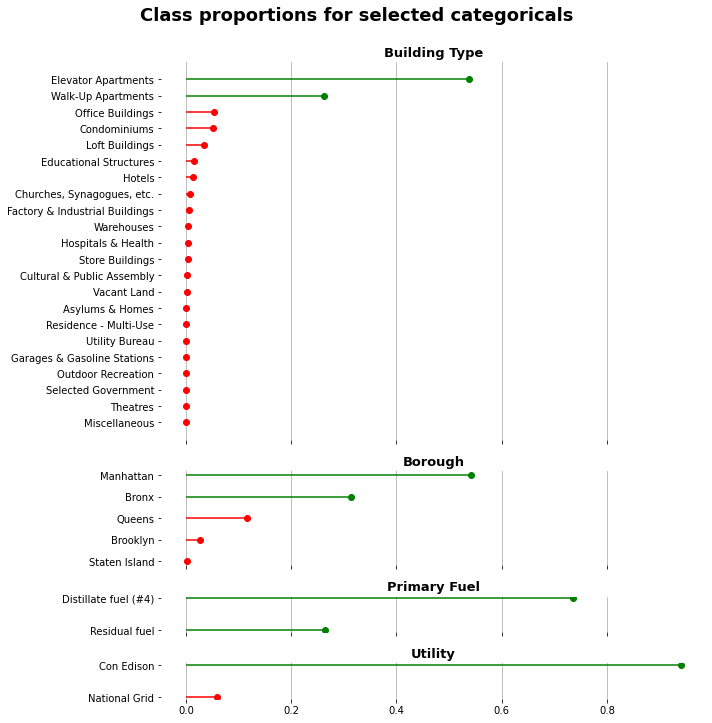

In [64]:
PROP_THRESH = 0.15

fig_catcount, ax_catcount = plt.subplots(4,
                                         sharex=True,
                                         figsize=(10, 10),
                                         gridspec_kw={"height_ratios": [16, 4, 1.5, 1.5]})

for col, ax in zip(["building_type",
                    "borough",
                    "primary_fuel",
                    "utility"],
                   ax_catcount.flat):

    # Proportions are cleaner.
    prop_cat = clean_heat[col].value_counts(normalize=True)
    prop_cat.sort_values(inplace=True)

    # We'll use different colors to draw attention to low proportions
    colors = ["red" if prop <= PROP_THRESH else "green" for prop in prop_cat]
    ax.hlines(prop_cat.index, xmin=0, xmax=prop_cat, colors=colors)
    
    # We can probably make this cleaner.
    # Plot the circles for each based on whether they're too small or not.
    # Maybe change the colors later?
    prop_small = prop_cat[prop_cat <= PROP_THRESH]
    prop_ok = prop_cat[prop_cat > PROP_THRESH]
    ax.plot(prop_small, prop_small.index, 'or',
            prop_ok, prop_ok.index, 'og')
    
    # Labels and customization
    ax.set_title(col.replace('_', ' ').title(),
                 {"size": 13,
                  "weight": "bold"})
    # We don't need axis labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    # We only need an x grid rather than both.
    ax.grid(axis="x")
    ax.set_axisbelow(True)
    ax.set_frame_on(False)

# Figure customization
fig_catcount.suptitle("Class proportions for selected categoricals",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_catcount.tight_layout()

**Question:** Which variables have class issues and why?

## Distribution of selected numerical variables

(type stuff later)

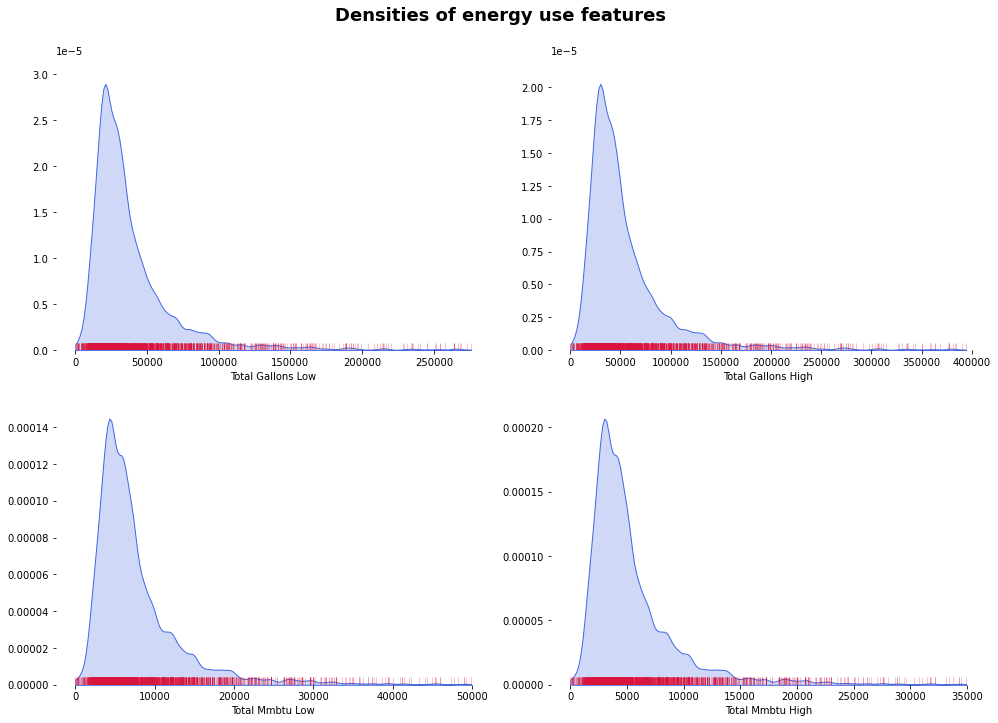

In [66]:
fig_gal_dist, axes_gal_dist = plt.subplots(2, 2, figsize=(14, 10))

for col, ax in zip(["total_gallons_low", "total_gallons_high",
                   "total_mmbtu_low", "total_mmbtu_high"],
                  axes_gal_dist.flat):
    
    # KDE plot showing the full range of data.
    # The estimation process is cut off to prevent negative values.
    sns.kdeplot(x=col,
                cut=0,
                ax=ax,
                bw_adjust=0.5,
                color="royalblue",
                fill=True,
                data=clean_heat)
    
    # Rug plot showing the actual data points.
    sns.rugplot(x=col,
                ax=ax,
                data=clean_heat,
                color="crimson",
                alpha=.25)
    
    ax.set_xlabel(col.replace('_', ' ').title())
    # Label is clear from title.
    ax.set_ylabel("")
    ax.set_frame_on(False)

# Figure titles
fig_gal_dist.suptitle("Densities of energy use features",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_gal_dist.tight_layout()

(1.0, 500000.0)

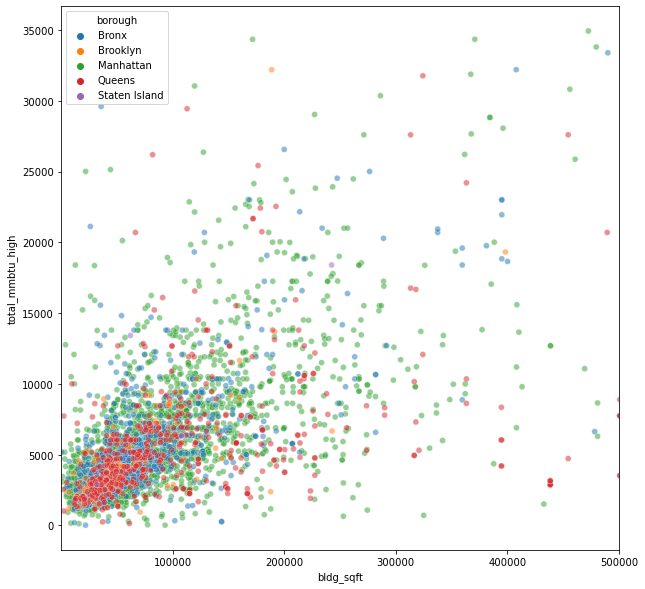

In [147]:
# TEMP

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="bldg_sqft", y="total_mmbtu_high", hue="borough", data=clean_heat, ax=ax, alpha=0.5)
ax.set_xlim(1, 500000)

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/super.jpg"> <a id=2></a>

## K-Nearest Neighbors (KNN)

KNN is simple yet performant supervised machine learning algorithm.

Let's say we have a classification problem where we're trying to label an unknown point, p, that may be _red_ or _blue_. A reasonable approach is to look at the p's _nearest neighbors._ If the point is closest to more blue then we classify it as blue and vice versa for red. We decide based on the _k_ nearest neighbors. For example, if the point is near three red with a _k_ of five then we can reasonably assume that p is red with a 60% chance (that is, $\frac{3}{5}=.6$). This process is known as **voting.**

KNN also works for regression. KNN regression calculates the mean of the nearest neighbors as a prediction instead of calculating the probability that a point is of a certain class.

In other words, birds of a feather flock together. Despite the seeming simplicity, KNN is a remarkably good algorithm. Let's look at a simple model to try out KNN.

## The scikit-learn workflow via a simple model

* Clean the data
* Split data into training and test sets
* Apply preprocessing such as scaling the variables to the **training set only**
* Choose a model type that best represents the problem domain
* Tune the model's hyper parameters
* Fit and test model's robustness on the test set (which will be scaled by the training set's parameters)

As mentioned earlier, our data set isn't really designed for prediction. However, we can still use what we have in order to demonstrate the models.

We already cleaned the data with the exception of handling missing values. Null values is a complicated topic in data as how we handle them is entirely dependent on the type of missing value as well as our problem. The worst technique is to fill the missings by the mean or median. Imputation is out of the scope of this workshop, so we'll drop the nulls for convenience.

### Training and testing sets

### Why?
ML models are tested on new or unseen data in order to quantify robustness. In other words, we need to test how well our model performs by using data beyond what was "learned." Thus, the data are split into **training** and **test** sets in order to fit the model to training set and quantify performance using the test set. **We do not touch the test set.** The test set shouldn't be used at all to influence to model. For example, you should standardize your training set _only_ rather than standardizing the entire data set at once. Standardizing the entire data set technically "leaks" information from the testing set into the training set. This is appropriately known as **data leakage**. Scikit-learn's _Pipeline_ feature mitigates data leakage for you.

### Sklearn's train_test_split

Let's split the data into training and set sets using scikit-learn. The function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) shuffles and splits data randomly. Key parameters include:

* The X (predictors) and y (response) data.
* test_size: a optional number or proportion that indicates the amount of data to include in the test set
* train_size: ditto for training
* random_state: random seed used to reproduce the split
* shuffle: randomly shuffle the data prior to splitting
* stratify: sample the data based on the strafication of a certain variable

The test size defaults to 25% of the data, but different splits may be applied as well. You also don't need to supply both the _test_size_ and _train_size_ parameters as _train_size_ defaults to the complement of _test_size_.

Stratification is useful when classes are imbalanced. For example, we may stratify on an imbalanced response for consistency or else we may end up with a training set that is missing some of the classes!

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

clean_heat_knn = clean_heat[["bldg_sqft", "total_gallons_high", "greener_greater_buildings"]].dropna()

X_train, X_test, y_train, y_test = train_test_split(clean_heat_knn[["bldg_sqft", "total_gallons_high"]],
                                                    clean_heat_knn.greener_greater_buildings,
                                                    random_state=42)

We first import the required functions and classes. If we were doing a regression we would import [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) instead.

As discussed above, we have to drop `NaN`s from our columns. We selected the columns we need and dropped `NaN`s from the subset rather than drop nulls across the data set. Dropping nulls across the data set would throw away _much_ more data.

Finally, we call `train_test_split` and pass in our X and y with a `random_state` of 42 for reproducibility. We opted not to stratify on our target, `greener_greater_buildings`, because the mix between the categories is healthy.

The variable names `X_train`, `X_test`, `y_train`, and `y_test` are standard.

### Fitting (training) the model

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='k', ylabel='Accuracy'>)

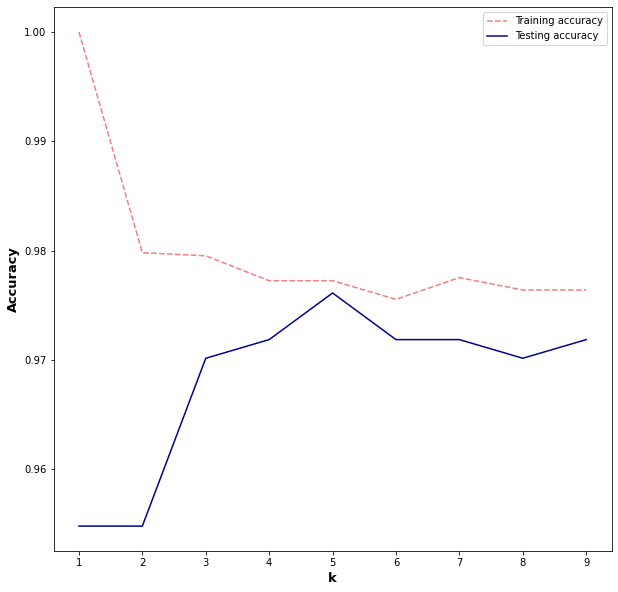

In [146]:
from sklearn.metrics import classification_report
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# knn_clf.score(X_test, y_test)
#print(classification_report(y_test, knn_clf.predict(X_test)))
elbow_plot(X_train, y_train, X_test, y_test, 10)

### Choosing the best k: the elbow plot

[to do]

In [141]:
def elbow_plot(X_train, y_train, X_test, y_test, k_max=10):
    training_accuracy = []
    testing_accuracy = []
    k_range = list(range(1, k_max))
    label_style = {"weight": "bold",
                   "size": 13}
    
    # Calculate the training and test scores up to k_max - 1
    for k in k_range:
        knn = KNeighborsClassifier(k).fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train, y_train))
        testing_accuracy.append(knn.score(X_test, y_test))
    
    # Plot both and label
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(x=k_range, y=training_accuracy,
                 color="lightcoral", ax=ax,
                 label="Training accuracy",
                 linestyle='--')
    sns.lineplot(x=k_range, y=testing_accuracy,
                 label="Testing accuracy",
                 color="darkblue", ax=ax)
    ax.set_ylabel("Accuracy",
                  fontdict=label_style)
    ax.set_xlabel("k",
                  fontdict=label_style)
    
    return fig, ax

In [262]:
k_range = range(1,18)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

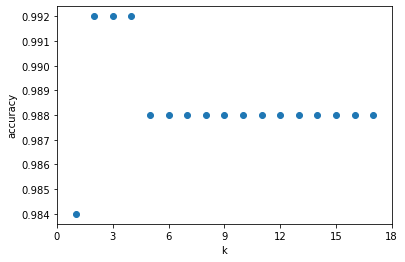

In [263]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,3,6,9,12, 15, 18]);

In [266]:
t = [0.984, 0.985, 0.986, 0.987, 0.989, 0.990, 0.991]

knn = KNeighborsClassifier(n_neighbors = 3)

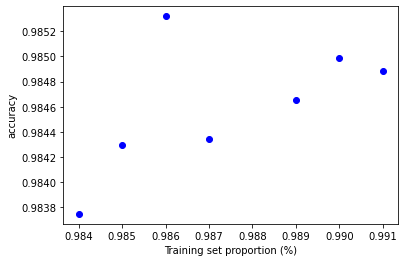

In [267]:
plt.figure()

for s in t:

    scores = [] #List for scores, but reset with each value in the list, t
    for i in range(1,1000): #Train for a 1,000 iterations 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test)) #Append scores
    plt.plot(s, np.mean(scores), 'bo') #Save the average value of these scores for this value in t

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Try it yourself 

Please give the participants some challange


<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsup.jpg"> <a id=3></a>

## PCA 

In [223]:
Data = pd.read_json("https://data.cityofnewyork.us/resource/h5f7-3btz.json")

Data



,pub_dt,fisc_yr,agy_nm,exp,cap_repr,cap_mgtn
0,20200416,2021,Health and Hospitals Corporation,1.228660e+08,9.834587e+08,7.568733e+08
1,20200416,2021,Department of Parks and Recreation,9.447368e+07,7.748664e+08,2.451435e+08
2,20200416,2021,Department of Environmental Protection,6.169037e+08,2.635274e+08,2.948563e+08
3,20200416,2021,Department of Education / School Construction ...,9.488819e+07,5.443869e+08,1.916224e+08
4,20200416,2021,Department of Transportation,1.049950e+07,1.274047e+08,4.604212e+06
5,20200416,2021,Police Department,2.021640e+08,8.080028e+07,1.132206e+07
6,20200416,2021,Fire Department,2.547157e+07,1.996169e+08,4.047178e+06
7,20200416,2021,Department of Sanitation,1.771236e+08,2.905189e+07,1.100613e+07
8,20200416,2021,Department of Cultural Affairs,1.169097e+06,1.218306e+08,6.926632e+07
9,20200416,2021,Department of Corrections,3.375761e+06,7.047919e+07,1.498538e+07


In [224]:
#Standardize the Data

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
x = Data[['exp', 'cap_repr', 'cap_mgtn']]

In [227]:
y = Data[['agy_nm']]

In [228]:
x = StandardScaler().fit_transform(x)

In [229]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Set up the model, and we only want to collapse these data into two dimensions. 
principalComponents = pca.fit_transform(x) #Take our data--saved as x--and run the model.

In [230]:
#Now let's take the results--saved as principalComponents--and save it to a DataFrame.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [231]:
finalDf = pd.concat([principalDf, Data[['agy_nm']]], axis = 1)

In [232]:
finalDf.head()

,principal component 1,principal component 2,agy_nm
0,1.763721,-0.742329,Health and Hospitals Corporation
1,0.525637,-0.545801,Department of Parks and Recreation
2,0.896682,2.839576,Department of Environmental Protection
3,0.075826,-0.346903,Department of Education / School Construction ...
4,-1.065777,-0.442990,Department of Transportation


In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

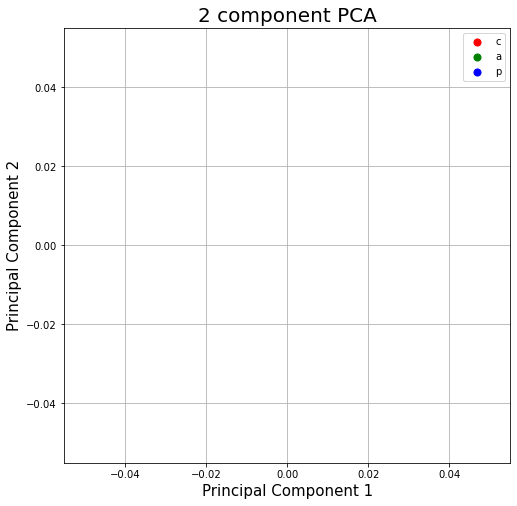

In [234]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
agy_nm = ['exp', 'cap_repr', 'cap_mgtn']
colors = ['r', 'g', 'b']
for agy_nm, color in zip(agy_nm,colors):
    indicesToKeep = finalDf['agy_nm'] == agy_nm
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(agy_nm)
ax.grid()